# Logistic Regression

## 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


## 2. Import and pre-process the Data

In [3]:
df = pd.read_csv('./Data/onlinefraud.csv')

df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
df.head()

df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Split the dataset into features (X) and target variable (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Split the data into test, train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 3. Helper function

In [4]:
# Display Confusion Matrix
def display_confusion_matrix(confusion_matrix):
    labels = ['Not Fraud', 'Fraud']
    confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=labels)

    confusion_matrix_display.plot()

    plt.title('Random Forest Confusion Matrix:')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.figure(figsize=(5,5))

    plt.show()

## 4. Models

### 4A. Logistic Regression (Non-scaled Data)

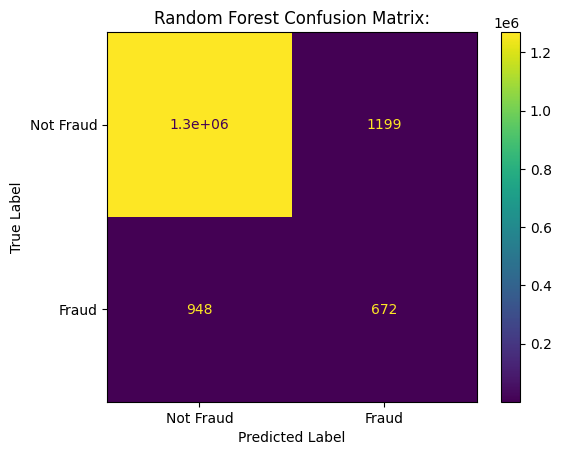

<Figure size 500x500 with 0 Axes>

Accuracy: 0.9983128019589415
Precision: 0.35916622127204706
Recall: 0.4148148148148148


In [5]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
nonscaled_confusion_matrix = confusion_matrix(y_test, y_pred)
nonscaled_accuracy = accuracy_score(y_test, y_pred)
nonscaled_precision = precision_score(y_test, y_pred)
nonscaled_recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
display_confusion_matrix(nonscaled_confusion_matrix)
print("Accuracy:", nonscaled_accuracy)
print("Precision:", nonscaled_precision)
print("Recall:", nonscaled_recall)

### 4B. Logistic Regression (Scaled Data)

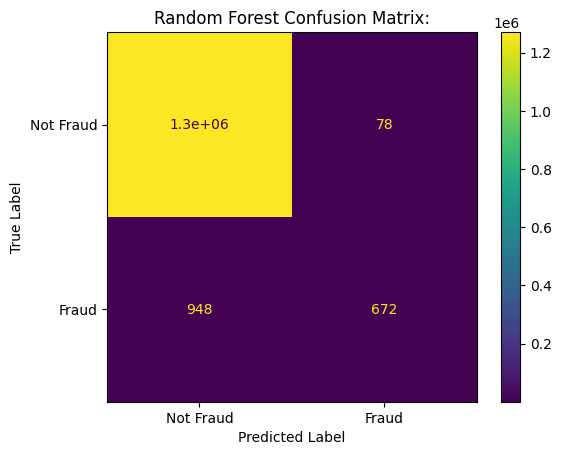

<Figure size 500x500 with 0 Axes>

Accuracy: 0.9991937283697596
Precision: 0.896
Recall: 0.4148148148148148


In [19]:
# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
scaled_confusion_matrix = confusion_matrix(y_test, y_pred)
scaled_accuracy = accuracy_score(y_test, y_pred)
scaled_precision = precision_score(y_test, y_pred)
scaled_recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
display_confusion_matrix(scaled_confusion_matrix)
print("Accuracy:", scaled_accuracy)
print("Precision:", scaled_precision)
print("Recall:", scaled_recall)

### Scaled x vs unscaled x

the scaled x values seemed to have to same effect on the logistic regression and showed no improvement to the model

### 4C. Logistic Regression (SMOTE)

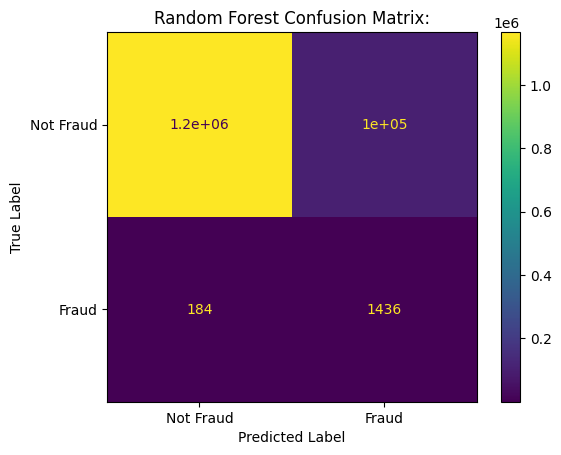

<Figure size 500x500 with 0 Axes>

Accuracy: 0.9177005698910198
Precision: 0.013549726363464805
Recall: 0.8864197530864197


In [7]:
# Adjust Data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
scaled_confusion_matrix = confusion_matrix(y_test, y_pred)
scaled_accuracy = accuracy_score(y_test, y_pred)
scaled_precision = precision_score(y_test, y_pred)
scaled_recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
display_confusion_matrix(scaled_confusion_matrix)
print("Accuracy:", scaled_accuracy)
print("Precision:", scaled_precision)
print("Recall:", scaled_recall)


#### Interpretation of above graph

using __SMOTE__ to rebalance the data increased the recall of the Logistic model from 41.48% to 88.64%, making it a viable option for the optimal model choice.